<a href="https://colab.research.google.com/github/cagutierrezgu/My_Portfolio/blob/main/Car%20prices%20analysis/Analysis/Multilinear_regressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data analysis

### Regresiones multilineales

La relación vista entre estas las dos características anteriores no parece ser muy evidente. En razón de estos resultados anteriores se propone realizar una regresión multilineal para explorar la relación entre el precio y otras variables en simultáneo, por ejemplo su relación con *engine_cylinders* y *engine_hp*, y la relación con las dos anteriores más la variable *year*:

In [ ]:
df_multi = df_clean.copy()

outliers(df_multi,'engine_cylinders')
outliers(df_multi,'engine_hp')
outliers(df_multi,'number_of_doors')
outliers(df_multi,'highway_mpg')
outliers(df_multi,'city_mpg')
outliers(df_multi,'popularity')

df_multi

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11222,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,midsize,4dr_hatchback,23,16,204,46120
11223,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,midsize,4dr_hatchback,23,16,204,56670
11224,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,midsize,4dr_hatchback,23,16,204,50620
11225,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,midsize,4dr_hatchback,23,16,204,50920


In [ ]:
model = sm.OLS.from_formula("msrp ~ engine_cylinders + engine_hp + year", data=df_multi)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   msrp   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     5024.
Date:                Sun, 18 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:08:53   Log-Likelihood:            -1.2613e+05
No. Observations:               11227   AIC:                         2.523e+05
Df Residuals:                   11223   BIC:                         2.523e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -6.761e+05   5.94e+04    -11.385      0.000   -7.93e+05    -5.6e+05
engine_cylinders -3892.3711    207.672    -18.743      0.000   -4299.444   -3485.298
engine_hp          264.7600      3.700     71.549      0.000     257.507     272.013
year               332.0983     29.510     11.254      0.000     274.254     389.943
==============================================================================
Omnibus:                    12515.705   Durbin-Watson:                   0.489
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1864579.966
Skew:                           5.560   Prob(JB):                         0.00
Kurtosis:                      65.147   Cond. No.                     6.96e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.96e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model = sm.OLS.from_formula("msrp ~ engine_cylinders + engine_hp", data=df_multi)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   msrp   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     7390.
Date:                Sun, 18 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:08:53   Log-Likelihood:            -1.2619e+05
No. Observations:               11227   AIC:                         2.524e+05
Df Residuals:                   11224   BIC:                         2.524e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -7827.1743    680.913    -11.495      0.000   -9161.882   -6492.466
engine_cylinders -5190.5259    173.653    -29.890      0.000   -5530.916   -4850.136
engine_hp          291.7240      2.836    102.874      0.000     286.165     297.283
==============================================================================
Omnibus:                    11920.043   Durbin-Watson:                   0.504
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1563008.179
Skew:                           5.134   Prob(JB):                         0.00
Kurtosis:                      59.884   Cond. No.                     1.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Entre la multiple y variada información acerca de las regresiones hechas puede apreciarse un dato curioso, y es que el coeficiente de correlación $R^2$ incrementa al agregar el año de lanzamiento del vehículo a pesar de que la relación lineal que esta variable tiene con el precio es bastante menor que la de las otras características.

Por otro lado, podría intentarse realizar una regresión con todas la variables numéricas:

In [ ]:
model = sm.OLS.from_formula('''msrp ~ engine_cylinders + engine_hp + number_of_doors
                            + city_mpg + highway_mpg + popularity''', data=df_multi)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   msrp   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     2570.
Date:                Sun, 18 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:08:53   Log-Likelihood:            -1.2605e+05
No. Observations:               11227   AIC:                         2.521e+05
Df Residuals:                   11220   BIC:                         2.522e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -2.714e+04   2080.454    -13.044      0.000   -3.12e+04   -2.31e+04
engine_cylinders -3252.8855    226.477    -14.363      0.000   -3696.820   -2808.951
engine_hp          292.6612      2.902    100.855      0.000     286.973     298.349
number_of_doors  -1460.5041    199.823     -7.309      0.000   -1852.193   -1068.816
city_mpg           971.7546    117.804      8.249      0.000     740.839    1202.670
highway_mpg       -139.7374     85.273     -1.639      0.101    -306.887      27.412
popularity          -0.9035      0.119     -7.579      0.000      -1.137      -0.670
==============================================================================
Omnibus:                    12097.023   Durbin-Watson:                   0.513
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1709578.592
Skew:                           5.243   Prob(JB):                         0.00
Kurtosis:                      62.537   Cond. No.                     2.60e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

El resultado obtenido en el coeficiente de correlación, aunque levemente, es nuevamente mejorado. Otra de las alternativas para hacer modelos predictivos es construir una regresión multilineal con un conjunto de datos de entrenamiento para ser probado en un conjunto de prueba, como se suele trabajar en aprendizaje de máquinas:

In [ ]:
# Porcentajes del conjunto entrenamiento, validación y prueba
n = len(df_multi)
val = int(0.2*n)
test = int(0.2*n)
train = n - (val + test)

# Definición de dataframes para cada conjunto aleatoriamente
np.random.seed(3)
shuffled = np.arange(n)
np.random.shuffle(shuffled)
df_shuffled = df_multi.iloc[shuffled]
df_train = df_shuffled.iloc[:train].copy()
df_val = df_shuffled.iloc[train:train+val].copy()
df_test = df_shuffled.iloc[train+val:].copy()

# Variable a predecir en escala logarítmica
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

# Eliminación de la columna con los valores a predecir
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [ ]:
# Definición del modelo de regresión:
def multilinear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

In [ ]:
# Aplicación de la función sobre todas las columnas numéricas
num = list(df_train.dtypes[df_train.dtypes == 'int64'].index) + \
      list(df_train.dtypes[df_train.dtypes == 'float64'].index)
df_num = df_train[num]

x_train = df_num.values
w_0, w = multilinear_regression(x_train, y_train)

Una vez con el modelo entrenado, lo probamos sobre el conjunto de prueba y graficamos la distribución esperada contra la predicha:

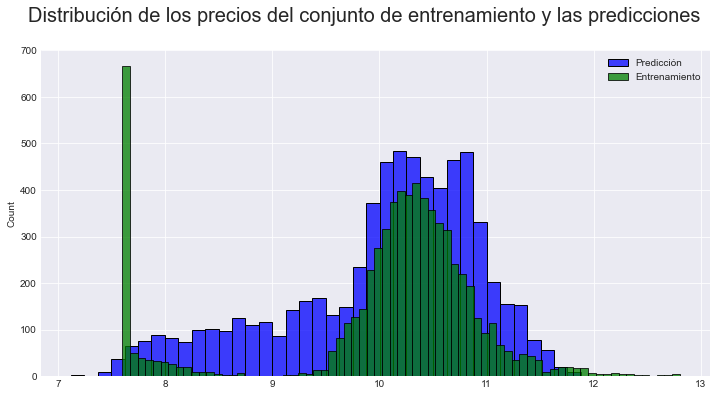

In [ ]:
y_pred = w_0 + x_train.dot(w)

plt.figure(figsize = (12,6));
sns.histplot(y_pred, label='Predicción', color = 'b')
sns.histplot(y_train, label='Entrenamiento', color = 'green')
plt.suptitle('Distribución de los precios del conjunto de entrenamiento y las predicciones', fontsize = 20);
plt.legend();

A partir de lo distribuciones observadas se puede afirmar que existe una mejor predicción por parte del modelo en la región de mayor densidad de precios de los vehículos, y debido a la gran cantidad de vehículos a 2000 la capacidad de predicción del modelo en esta región se ve muy afectada. Para cuantificar el error de la regresión hecha definimos la siguiente función:

In [ ]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error **2).mean()
    return np.sqrt(mse)

rmse(y_train, y_pred)

0.4883649774509866

Este resultado comparado con el coeficiente de correlación obtenido con el método *sm.OLS.from_formula* de *statsmodels* muestra mejor ajuste de los datos por parte del primer modelo realizado que el hecho a mano, lo cual puede deberse en parte al porcentaje de datos del conjunto de prueba y entrenamiento, entre otros factores.